# Geographical Plot

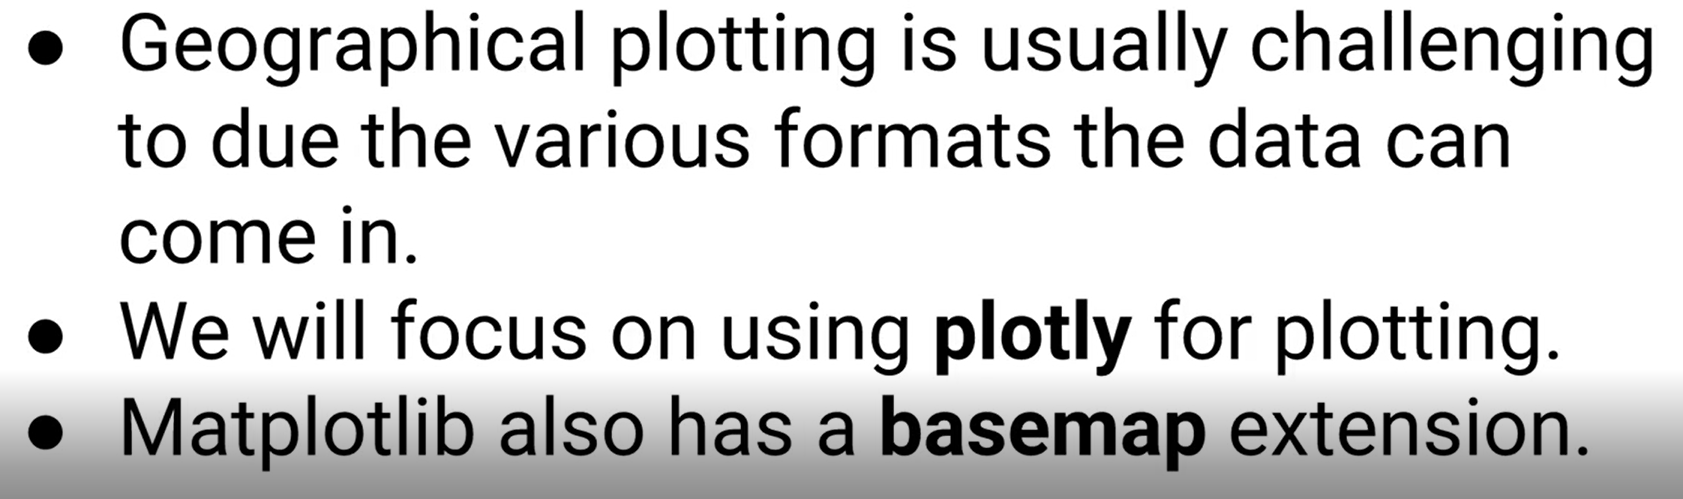

In [2]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=7af45864b23155cabf3da2a677a9da64c4bb44657d9ba85857310650d33ddb0c
  Stored in directory: c:\users\work is fun\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [8]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot    # to make plotly work offline

In [9]:
init_notebook_mode(connected=True)

### Choropleth Maps

In [10]:
import plotly.graph_objs as go

#### Example 1:

We build a data dictionary using **dict()** function as follows:

* type = 'choropleth',
* locations = list of states
* locationmode = 'USA-states'
* colorscale= a predefined string:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

or create a [custom colorscale](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= list or array of text to display per point
* z= array of values on z axis (color of state)
* colorbar = {'title':'Colorbar Title'})


In [40]:
# Create a plotly data dictionary
data_dict = dict(type='choropleth', 
                 locations = ['AZ', 'CA', 'NY'], # locations denote abbreviations of countries here
                 locationmode ='USA-states',  #Location mode tells plotly, we are referring to USA states -- This highlights the places in graph
                 colorscale = 'Blues',   #'Portland', 'Jet', 'Greens'
                 text = ['text 1','text 2', 'text 3'],    # Text is what hovers over each of the locations
                 z = [1.0,2.0,3.0], # Actual values that will be shown on colorscale
                 colorbar = {'title': 'Colorbar Title Goes Here'})


In [41]:
data_dict

{'colorbar': {'title': 'Colorbar Title Goes Here'},
 'colorscale': 'Blues',
 'locationmode': 'USA-states',
 'locations': ['AZ', 'CA', 'NY'],
 'text': ['text 1', 'text 2', 'text 3'],
 'type': 'choropleth',
 'z': [1.0, 2.0, 3.0]}

In [69]:
# Created a layout dictionary which is a nested dict
layout_dict = dict(geo={'scope':'usa'})

In [70]:
# Create a Figure
choromap = go.Figure(data=[data_dict], layout=layout_dict)

In [71]:
iplot(choromap)

### Example 2

In [3]:
import pandas as pd

In [47]:
# Get a dataframe
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [65]:
data = dict(type ='choropleth', 
            colorscale='YlOrRd',   # Yl=yellow, Or=Orange, Rd=Red
            locations = df['code'],   # Location Codes
            locationmode = 'USA-states',
            z = df['total exports'],
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2)),  # borders of states will be white here
            colorbar = {'title':'Millions USD'})

In [66]:
layout = dict(title = '2011 US Agriculture Exports by states',
             geo = dict(scope='usa', showlakes=True,     # showLakes actually shows lakes/water in graph
                       lakecolor='rgb(85,173,240)'))

In [67]:
choromap2 = go.Figure(data= [data], layout = layout)

In [68]:
iplot(choromap2)

### Exampl 3 : World Choropleth Map

In [4]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [5]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [13]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [14]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)